In [ ]:
## Observations and Insights 

Pymaceuticals Inc

Observations:

1.- Only the drug regimens capomulin and ramicane have an average tumor volume below 41 mm3, the others exceed 50 mm3.    
    
2.-It is observed that in the case of the selected mouse, the b128, there is a decrease in the volume of the tumor when the
treatment time is increased.

3.- In the case of mice treated with the capomulin drug regimen, it is observed that there is a strong positive correlation 
between the weight of the mice and the average tumor volume, the higher the weight of the mice, the greater the average tumor
volume.

4.- Regarding the search for outliers, it is observed that if several drug regimens are put together and the analysis is
carried out, it could be different if each drug regimen is analyzed separately, so it is important how to perform this type
of analysis.

This work was elaborated by CVM.





In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import os
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(study_results, mouse_metadata, on=["Mouse ID"])

# Display the data table for preview
mouse_study.head()

#mouse_study.to_csv("Data/mouse_study.csv")

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22

In [3]:
# Checking the number of mice.
unique_mouses = len(mouse_study['Mouse ID'].unique())
unique_mouses

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_rows = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicated_rows.head(50)


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26

In [5]:
#Mouse ID of duplicate rows
duplicated_mice_id = duplicated_rows['Mouse ID'].unique()
duplicated_mice_id


array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicated_mouse_id_rows = mouse_study.loc[mouse_study['Mouse ID'] == "g989"]
duplicated_mouse_id_rows.head(50)


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1     Propriva   
872     g989         35           62.570880                 2     Propriva   

        Sex  Age_months  Weight (g)  
860  Female          21          26  
861  Female          21          26  
862  Female          21          26  
863  Female          21          26  
864  Female          21          26  
865  Female          21          26  
866  Female          21          26  
867  Female          21          26  
868  Female          21          26  
869  Female          21          26  
870  Female          21          26  
871  Female          21          26  
872  Female          21          26

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Any data asociated with tha mouse ID g989 is removed from the mouse_study DF, creating the mouse_study_clean to continue.
mouse_study_clean = mouse_study.loc[mouse_study['Mouse ID'] != "g989"]
#mouse_study_clean.head()


In [8]:
#print to csv to check on file, this line was only to check
#mouse_study_clean.to_csv("data/mouse_study_clean.csv")


In [9]:
# Checking the number of mice in the clean DataFrame. This line was to check than the list was reduced in one.
unique_mouses_clean = len(mouse_study_clean['Mouse ID'].unique())
unique_mouses_clean


248

In [10]:
#generating a list of drug regimen
print(mouse_study_clean["Drug Regimen"].unique())


['Capomulin' 'Ketapril' 'Naftisol' 'Infubinol' 'Stelasyn' 'Ramicane'
 'Zoniferol' 'Propriva' 'Placebo' 'Ceftamin']


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#mouse_study_clean[["Tumor Volume (mm3)"]].describe()
mouse_study_clean_mean = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
#mouse_study_clean_mean

mouse_study_clean_median = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
#mouse_study_clean_median

mouse_study_clean_var = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
#mouse_study_clean_var

mouse_study_clean_std = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
#mouse_study_clean_std

mouse_study_clean_sem = mouse_study_clean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
#mouse_study_clean_sem

mouse_study_clean_mean = mouse_study_clean_mean.to_frame().reset_index()
mouse_study_clean_mean = mouse_study_clean_mean.rename(columns={'Tumor Volume (mm3)': 'Mean Tumor Volume (mm3)'})

mouse_study_clean_median = mouse_study_clean_median.to_frame().reset_index()
mouse_study_clean_median = mouse_study_clean_median.rename(columns={'Tumor Volume (mm3)': 'Median Tumor Volume (mm3)'})

mouse_study_clean_var = mouse_study_clean_var.to_frame().reset_index()
mouse_study_clean_var = mouse_study_clean_var.rename(columns={'Tumor Volume (mm3)': 'Var Tumor Volume (mm3)'})

mouse_study_clean_std = mouse_study_clean_std.to_frame().reset_index()
mouse_study_clean_std = mouse_study_clean_std.rename(columns={'Tumor Volume (mm3)': 'Std Dev Tumor Volume (mm3)'})

mouse_study_clean_sem = mouse_study_clean_sem.to_frame().reset_index()
mouse_study_clean_sem = mouse_study_clean_sem.rename(columns={'Tumor Volume (mm3)': 'SEM Tumor Volume (mm3)'})

volume_summary = pd.merge(mouse_study_clean_mean, mouse_study_clean_median, on="Drug Regimen")
volume_summary = pd.merge(volume_summary, mouse_study_clean_var, on="Drug Regimen" )
volume_summary = pd.merge(volume_summary, mouse_study_clean_std, on="Drug Regimen" )
volume_summary = pd.merge(volume_summary, mouse_study_clean_sem, on="Drug Regimen" )
volume_summary


Drug Regimen  Mean Tumor Volume (mm3)  Median Tumor Volume (mm3)  \
0    Capomulin                40.675741                  41.557809   
1     Ceftamin                52.591172                  51.776157   
2    Infubinol                52.884795                  51.820584   
3     Ketapril                55.235638                  53.698743   
4     Naftisol                54.331565                  52.509285   
5      Placebo                54.033581                  52.288934   
6     Propriva                52.320930                  50.446266   
7     Ramicane                40.216745                  40.673236   
8     Stelasyn                54.233149                  52.431737   
9    Zoniferol                53.236507                  51.818479   

   Var Tumor Volume (mm3)  Std Dev Tumor Volume (mm3)  SEM Tumor Volume (mm3)  
0               24.947764                    4.994774                0.329346  
1               39.290177                    6.268188                0.469821  
2               43.128684                    6.567243                0.492236  
3               68.553577                    8.279709                0.603860  
4               66.173479                    8.134708                0.596466  
5               61.168083                    7.821003                0.581331  
6               43.852013                    6.622085                0.544332  
7               23.486704                    4.846308                0.320955  
8               59.450562                    7.710419                0.573111  
9               48.533355                    6.966589                0.516398

## Bar and Pie Charts

In [12]:
#generating the count of measurements taken by drug regimen to prepare to plot.

number_meas = mouse_study_clean.groupby(['Drug Regimen']).count()
number_meas


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Sex  \
Drug Regimen                                                                   
Capomulin          230        230                 230               230  230   
Ceftamin           178        178                 178               178  178   
Infubinol          178        178                 178               178  178   
Ketapril           188        188                 188               188  188   
Naftisol           186        186                 186               186  186   
Placebo            181        181                 181               181  181   
Propriva           148        148                 148               148  148   
Ramicane           228        228                 228               228  228   
Stelasyn           181        181                 181               181  181   
Zoniferol          182        182                 182               182  182   

              Age_months  Weight (g)  
Drug Regimen                          
Capomulin            230         230  
Ceftamin             178         178  
Infubinol            178         178  
Ketapril             188         188  
Naftisol             186         186  
Placebo              181         181  
Propriva             148         148  
Ramicane             228         228  
Stelasyn             181         181  
Zoniferol            182         182

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

regimen_count = number_meas[['Timepoint']].copy()
regimen_count = regimen_count.rename(columns={'Timepoint': 'Count'})

#regimen_count

regimen_count.plot(kind="bar", figsize=(10,4), color = 'b', width=0.8)
plt.title("Number of measurements by drug regimen")
plt.xticks(rotation=0)
plt.ylabel("Number of measurements")



<IPython.core.display.Javascript object>

Text(0, 0.5, 'Number of measurements')

<IPython.core.display.Javascript object>


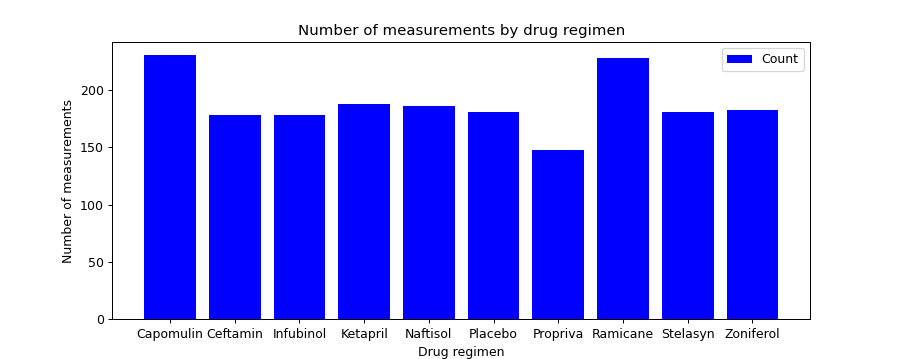

In [14]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", 
               "Zoniferol"]
number = number_meas.loc[:,'Timepoint']
x_axis = number.values
#x_axis

plt.figure(figsize=(10,4))
plt.bar(drug_regimen, x_axis, color = 'b', label="Count")
plt.show()

plt.title("Number of measurements by drug regimen")
plt.xlabel("Drug regimen")
plt.ylabel("Number of measurements")
plt.legend()


In [15]:
# preparing information for pie charts

number_sex = mouse_study_clean.groupby(['Sex']).count()
#number_sex

female_male = number_sex[['Timepoint']].copy()
female_male = female_male.rename(columns={'Timepoint': ' '})
female_male


Sex        
Female  922
Male    958

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["green", "blue"]
female_male.plot(kind="pie", y = " ", colors=colors, title="Distribution of female vs male", legend=False, 
                 figsize=(5, 5), autopct="%1.1f%%")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


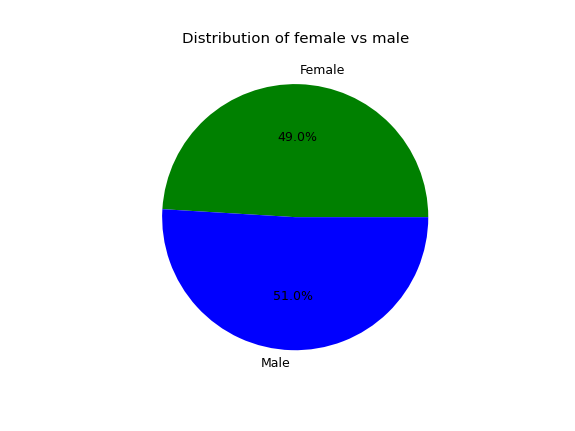

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()
labels = ["Female", "Male"]
size = [922, 958]
colors = ["green", "blue"]
#explode = (0.05, 0)
plt.title("Distribution of female vs male")
#plt.legend()
#plt.axis("equal")

plt.pie(size, labels=labels, colors=colors, autopct="%1.1f%%")
plt.show()
          

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

four_drugs = mouse_study_clean.loc[(mouse_study_clean["Drug Regimen"] == "Capomulin") | 
                                    (mouse_study_clean["Drug Regimen"] == "Ceftamin")  | 
                                    (mouse_study_clean["Drug Regimen"] == "Infubinol") |
                                    (mouse_study_clean["Drug Regimen"] == "Ramicane"), :]

#four_drugs.head(20)

# Start by getting the last (greatest) timepoint for each mouse

four_drugs_last = four_drugs.groupby("Mouse ID").last()
#four_drugs_last.head()


In [19]:
#Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment
#regimens.

quartiles = four_drugs_last["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#lower_bound
#=3.073966

#upper_bound
#= 94.044038

#outlaiers rows

outliers = four_drugs_last.loc[(four_drugs_last['Tumor Volume (mm3)'] > upper_bound) | (four_drugs_last['Tumor Volume (mm3)']
                                                                                        < lower_bound), :]
outliers.head()

#apparently there are no outliers in the dataframe reviewed

Empty DataFrame
Columns: [Timepoint, Tumor Volume (mm3), Metastatic Sites, Drug Regimen, Sex, Age_months, Weight (g)]
Index: []

In [20]:
#generating the data per drug regimen to plot
#for Capomulin
Capomulin_data = four_drugs_last.loc[four_drugs_last["Drug Regimen"] == "Capomulin"]
#Capomulin_data.head()
Capomulin = Capomulin_data["Tumor Volume (mm3)"]
#Capomulin

#For Ceftamin 
Ceftamin_data = four_drugs_last.loc[four_drugs_last["Drug Regimen"] == "Ceftamin"]
#Capomulin_data.head()
Ceftamin = Ceftamin_data["Tumor Volume (mm3)"]
#Ceftamin

#For Infubinol 
Infubinol_data = four_drugs_last.loc[four_drugs_last["Drug Regimen"] == "Infubinol"]
#Capomulin_data.head()
Infubinol = Infubinol_data["Tumor Volume (mm3)"]
#Infubinol

#For Ramicane 
Ramicane_data = four_drugs_last.loc[four_drugs_last["Drug Regimen"] == "Ramicane"]
#Capomulin_data.head()
Ramicane = Ramicane_data["Tumor Volume (mm3)"]
#Ramicane


In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data = [Capomulin, Ceftamin, Infubinol, Ramicane]
xticklabels = ("Capomulin", "Ceftamin", "Infubinol", "Ramicane")
red_square = dict(markerfacecolor='r', marker='s')
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.set_xlabel('Drug Regimen')
ax1.set_xticklabels(xticklabels, rotation=0, fontsize=10)
#ax1.set_xlabel("Capomulin", "Ceftamin", "Infubinol", "Ramicane")
ax1.boxplot(data, flierprops=red_square)
#figsize=(10, 4)
plt.show()

#Comment
#an outlier point appeared in the analysis by drug regimen, in the Infubinol drug boxchart.


<IPython.core.display.Javascript object>

## Line and Scatter Plots

<IPython.core.display.Javascript object>


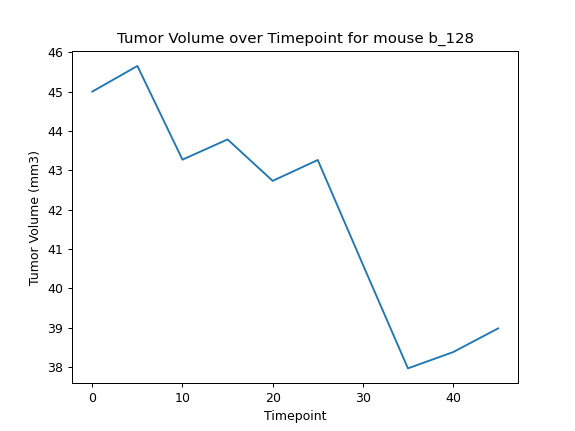

Text(0, 0.5, 'Tumor Volume (mm3)')

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Mouse "b128" was selected from all treated with Capomulin to continue with the analysis

mouse_b128 = mouse_study.loc[mouse_study['Mouse ID'] == "b128"]
#mouse_b128.head(20)

tumor_volumen_b128 = mouse_b128["Tumor Volume (mm3)"]
#tumor_volumen_b128

time_point_b128 = mouse_b128["Timepoint"]
#time_point_b128

#creating the line plot
plt.figure()
plot_b128 = plt.plot(time_point_b128, tumor_volumen_b128)
plt.show()

plt.title("Tumor Volume over Timepoint for mouse b_128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")


<IPython.core.display.Javascript object>


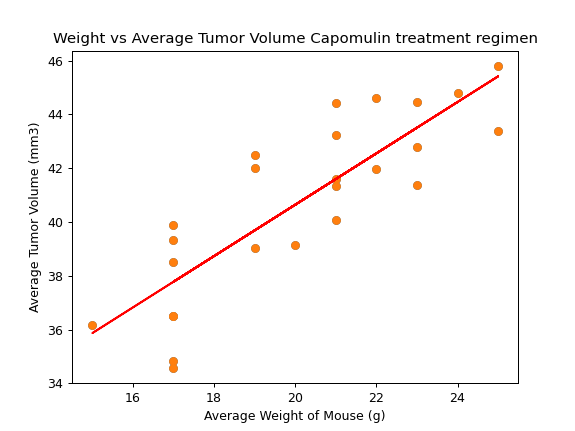

(0.8419363424694717, 1.322572243471279e-07)

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#calculating the average in tumpor volume and weight for all mouses treated with Capomulin
#selecting all mouses tretaed with Capomulin
all_capomulin = mouse_study_clean.loc[mouse_study_clean["Drug Regimen"] == "Capomulin"]
#all_capomulin.head()

#grouping the table by mouse id with mean to create x and y values
weight = all_capomulin.groupby(all_capomulin["Mouse ID"])["Weight (g)"].mean()
volume_average = all_capomulin.groupby(all_capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()
#weight.head(20)
#volume_average.head(20)

plt.figure()
plt.scatter(weight,volume_average)
plt.title("Weight vs Average Tumor Volume Capomulin treatment regimen")
plt.xlabel("Average Weight of Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
st.pearsonr(weight,volume_average)


## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
weight = all_capomulin.groupby(all_capomulin["Mouse ID"])["Weight (g)"].mean()
volume_average = all_capomulin.groupby(all_capomulin["Mouse ID"])["Tumor Volume (mm3)"].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,volume_average)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume_average)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=14,color="red")
plt.xlabel("Average Weight of Mouse (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The r-square is: {rvalue**2}")
#st.pearsonr(weight,volume_average)
plt.show()
st.pearsonr(weight,volume_average)

#the correlation coefficient is 0.8419 so a strong correlation is observed


The r-square is: 0.7088568047708717


(0.8419363424694717, 1.322572243471279e-07)